In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
import torch.nn as nn 
import torch.nn.functional as F

In [5]:
df = pd.read_csv('../PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [6]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [8]:
# because distance in Kilometer matters for taxi fare price for that we using haversine distance formulla(just google search)

def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [9]:
df['dist_km'] = haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [10]:
df.head(2)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307


In [11]:
df['pickup_datetime']

0         2010-04-19 08:17:56 UTC
1         2010-04-17 15:43:53 UTC
2         2010-04-17 11:23:26 UTC
3         2010-04-11 21:25:03 UTC
4         2010-04-17 02:19:01 UTC
                   ...           
119995    2010-04-18 14:33:03 UTC
119996    2010-04-23 10:27:48 UTC
119997    2010-04-18 18:50:40 UTC
119998    2010-04-13 08:14:44 UTC
119999    2010-04-17 16:00:14 UTC
Name: pickup_datetime, Length: 120000, dtype: object

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [14]:
df.head(2)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307


In [15]:
# because this data belongs to utc time format but we need nyc time format for that we have to subtract 4 hour time from utc time.....

df['EDT_date'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)

In [16]:
# droping the pickup_datetime column...

df.drop('pickup_datetime', axis = 1, inplace = True)

In [17]:
# from EDT_date column we can extract the pickup hour.....

df['pickup_hour'] = df['EDT_date'].dt.hour

In [18]:
# from pickup hour we can also extract when the pickup exatly made means 'am' or 'pm' using numpy....

df['AMorPM'] = np.where(df['pickup_hour']<12,'am','pm')

In [19]:
df.head(2)

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDT_date,pickup_hour,AMorPM
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am


In [20]:
df['week_day'] = df['EDT_date'].dt.strftime('%a')

In [21]:
df.head(2)

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDT_date,pickup_hour,AMorPM,week_day
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat


In [22]:
# now we don't need the EDT date column:

df.drop('EDT_date', axis = 1, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        120000 non-null  float64
 1   fare_class         120000 non-null  int64  
 2   pickup_longitude   120000 non-null  float64
 3   pickup_latitude    120000 non-null  float64
 4   dropoff_longitude  120000 non-null  float64
 5   dropoff_latitude   120000 non-null  float64
 6   passenger_count    120000 non-null  int64  
 7   dist_km            120000 non-null  float64
 8   pickup_hour        120000 non-null  int64  
 9   AMorPM             120000 non-null  object 
 10  week_day           120000 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 10.1+ MB


#### Choosing the Categorical and Contineous columns for models:

In [24]:
for i in df.columns:
    print("Columns: {} ---------> unique_values: {}".format(i,df[i].nunique()))

Columns: fare_amount ---------> unique_values: 414
Columns: fare_class ---------> unique_values: 2
Columns: pickup_longitude ---------> unique_values: 55583
Columns: pickup_latitude ---------> unique_values: 63302
Columns: dropoff_longitude ---------> unique_values: 59064
Columns: dropoff_latitude ---------> unique_values: 67362
Columns: passenger_count ---------> unique_values: 5
Columns: dist_km ---------> unique_values: 119999
Columns: pickup_hour ---------> unique_values: 24
Columns: AMorPM ---------> unique_values: 2
Columns: week_day ---------> unique_values: 7


In [25]:
cat_columns = ['pickup_hour', 'AMorPM', 'week_day']

In [26]:
# choosing label

y_col = ['fare_class']

In [27]:
cont_columns = []

for i in df.columns:
    if i in cat_columns:
        pass
    elif i in y_col:
        pass
    else:
        cont_columns.append(i)

In [28]:
cont_columns

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'dist_km']

In [29]:
# converting the object columns into category columns:

for i in cat_columns:
    df[i] = df[i].astype('category')

In [30]:
for i in cat_columns:
    print(df[i].head())
    print('\n')

0     4
1    11
2     7
3    17
4    22
Name: pickup_hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]


0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]


0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: week_day, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]




In [31]:
for i in cat_columns:
    print(df[i].cat.codes)
    print(df[i].cat.categories)
    print(df[i].cat.codes.values) #return into array values
    print('\n')

0          4
1         11
2          7
3         17
4         22
          ..
119995    10
119996     6
119997    14
119998     4
119999    12
Length: 120000, dtype: int8
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')
[ 4 11  7 ... 14  4 12]


0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8
Index(['am', 'pm'], dtype='object')
[0 0 0 ... 1 0 1]


0         1
1         2
2         2
3         3
4         0
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8
Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')
[1 2 2 ... 3 5 2]




In [32]:
cat_features = np.stack([df[i].cat.codes.values for i in cat_columns], axis = 1)

In [33]:
cat_features #columns wise stacking

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [34]:
#making the tensor
cat_features = torch.tensor(cat_features, dtype= torch.int64)

In [35]:
cat_features

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [36]:
cont_features = np.stack([df[i].values for i in cont_columns], axis = 1)

In [37]:
cont_features = torch.tensor(cont_features, dtype = torch.float)

In [38]:
cont_features

tensor([[  6.5000, -73.9924,  40.7305,  ...,  40.7447,   1.0000,   2.1263],
        [  6.9000, -73.9901,  40.7406,  ...,  40.7441,   1.0000,   1.3923],
        [ 10.1000, -73.9941,  40.7511,  ...,  40.7662,   2.0000,   3.3268],
        ...,
        [ 12.5000, -73.9886,  40.7498,  ...,  40.7078,   3.0000,   5.0525],
        [  4.9000, -74.0044,  40.7245,  ...,  40.7308,   1.0000,   1.2089],
        [  5.3000, -73.9554,  40.7719,  ...,  40.7630,   3.0000,   1.4274]])

In [39]:
y = torch.tensor(df[y_col].values).flatten()

In [40]:
# target features
y

tensor([0, 0, 1,  ..., 1, 0, 0])

In [41]:
print(cat_features.shape, cont_features.shape, y.shape)

torch.Size([120000, 3]) torch.Size([120000, 7]) torch.Size([120000])


In [42]:
# setting of the embedding size for categorical columns:

cat_size = [len(df[i].cat.categories) for i in cat_columns]

In [43]:
cat_size

[24, 2, 7]

In [44]:
embedding_size = [(size, min(50,(size+1)//2)) for size in cat_size]

In [45]:
embedding_size

[(24, 12), (2, 1), (7, 4)]

## Tabular Models

In [46]:
class TabularModel(nn.Module):
    def __init__(self,emb_szs, n_cont, out_sz, layers, p):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(i,o) for i,o in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((o for i,o in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, axis = 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont], axis = 1)
        x = self.layers(x)
        
        return x

In [47]:
torch.manual_seed(33)
model = TabularModel(emb_szs=embedding_size, n_cont=cont_features.shape[1], out_sz=2, layers=[200,100], p=0.4)

In [48]:
next(model.parameters()).is_cuda

False

In [49]:
my_model = model.cuda()

In [50]:
next(my_model.parameters()).is_cuda

True

In [51]:
my_model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=24, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [52]:
criterion = nn.CrossEntropyLoss()  # this is a classification problems.....
optimizer = torch.optim.Adam(my_model.parameters(), lr=0.001)

In [53]:
b = 60000
t = 12000 # selecting batch size and test size for model....

cat_train = cat_features[:b-t].cuda()
cat_test = cat_features[b-t:b].cuda()
con_train = cont_features[:b-t].cuda()
con_test = cont_features[b-t:b].cuda()
y_train = y[:b-t].cuda()
y_test = y[b-t:b].cuda()

In [54]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = my_model(cat_train, con_train)
    loss = criterion(y_pred, y_train) 
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.80931467
epoch:  26  loss: 0.24996760
epoch:  51  loss: 0.17560181
epoch:  76  loss: 0.13666806
epoch: 101  loss: 0.10006728
epoch: 126  loss: 0.06920582
epoch: 151  loss: 0.04876951
epoch: 176  loss: 0.03590335
epoch: 201  loss: 0.02696048
epoch: 226  loss: 0.02187313
epoch: 251  loss: 0.01765476
epoch: 276  loss: 0.01392848
epoch: 300  loss: 0.01222790

Duration: 47 seconds


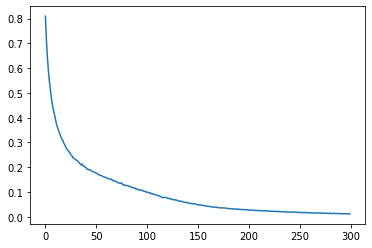

In [55]:
plt.plot(range(epochs), losses)

## Evaluating the model:

In [56]:
with torch.no_grad():
    y_val = my_model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'Loss: {loss:.8f}')

Loss: 0.10739263


In [57]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":45} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT                                  ARGMAX  Y_TEST
tensor([ 5.7497, -5.4643], device='cuda:0')    0      0   
tensor([  7.4163, -12.0170], device='cuda:0')    0      0   
tensor([ 6.4006, -7.1773], device='cuda:0')    0      0   
tensor([-7.9970,  8.2007], device='cuda:0')    1      1   
tensor([ 8.2596, -9.4994], device='cuda:0')    0      0   
tensor([ 7.1142, -7.2754], device='cuda:0')    0      0   
tensor([ 8.2660, -7.4401], device='cuda:0')    0      0   
tensor([-11.8382,  10.9902], device='cuda:0')    1      1   
tensor([ 7.8680, -8.5762], device='cuda:0')    0      0   
tensor([-0.5780,  0.5468], device='cuda:0')    1      1   
tensor([ 7.0794, -7.2397], device='cuda:0')    0      0   
tensor([ 7.0985, -6.9453], device='cuda:0')    0      0   
tensor([ 7.7802, -9.3401], device='cuda:0')    0      0   
tensor([-12.3631,  12.6830], device='cuda:0')    1      1   
tensor([ 6.5605, -4.3632], device='cuda:0')    0      0   
tensor([-9.5264,  9.8521], device='cuda:0')    1